# Laborator 1, partea 3 - Procesare imagine pentru modificare contrast 
 - afisare histograma 
 - accentuare contrast: 
     - functia liniara pe portiuni
     - egalizare de histograma

In [1]:
# Fiecare lucrare de laborator se va finaliza prin printarea script-ului 
#   sub forma unui raport si incarcarea lui online 
# Rapoartele trebuie incarcate pana la sfarsitul orei de laborator!!!

# Lucrare de laborator realizata de:
NumeStudent = "Oscar Gal"
Specializare = "TM" # TM/ TC/ SICAS
print("Lucrare de laborator realizata de: ", NumeStudent)
print(" \t de la specializarea: ", Specializare)


Lucrare de laborator realizata de:  Oscar Gal
 	 de la specializarea:   


In [2]:
import os
import numpy as np
import cv2 
import matplotlib.pyplot as plt


In [2]:
# In[1]: Incarcare imagine 
# Setare cale locatie imagini si nume fisier imagine
#from matplotlib import pyplot as plt
# stdSLR.jpg,  image001.bmp, image002.bmp, image003.bmp, floare_sa_gr_fc.png 
# elaine.512.bmp, tea.bmp 
print('\n   ----- INFO - In[1] Deschidere imagine -----\n')
imgsPath = "/Users/galoscar07/Documents/master2k20-2k22/2nd Semester/SIAI/Laborator/_TestImages" 
imgName = 'ImgTstGri/7.1.01.bmp'
imgFile = os.path.sep.join([imgsPath, imgName])

# deschidere imagine

imgBGR = cv2.imread(imgFile) 
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB) 

# conversie pe nivele de gri
imgGray = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY) # 

# Afisare imagine originala si cea pe nivele de gri
fig = plt.figure(figsize=(20,10)); 
ax=fig.add_subplot(1,2,1, xticks=[], yticks=[])
ax.imshow(imgRGB); ax.set_title("Imaginea originala (poate fi color sau direct pe nivele de gri)", color='black')

ax= fig.add_subplot(1,2,2, xticks=[], yticks=[]); 
ax.imshow(imgGray, cmap= 'gray', vmin=0, vmax=255); 
ax.set_title("Imaginea convertita pe nivele de gri", color='black')
plt.show()

print('\n Imaginea originala  ')
print("         Shape:" , imgRGB.shape)
print("         Type :" , imgRGB.dtype)
print("\n Imaginea convertita pe nivele de gri")
print("         Shape:" , imgGray.shape)
print("         Type :" , imgGray.dtype)

fig = plt.figure(figsize=(8,2)); plt.hist(imgGray.ravel(),256,[0,256]); 
plt.title("Histograma imaginii pe nivele de gri", color='black'); plt.show()
print('\n-------------------------------------------------------------------')


   ----- INFO - In[1] Deschidere imagine -----



NameError: name 'os' is not defined


   ----- INFO - In[2] Modificare nivele de gri -----



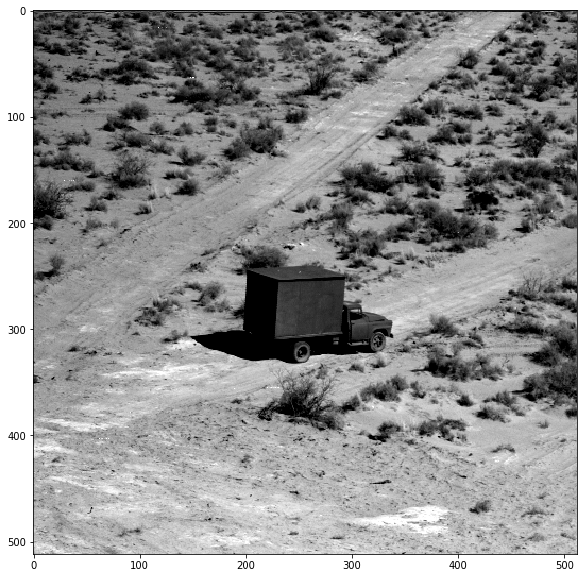

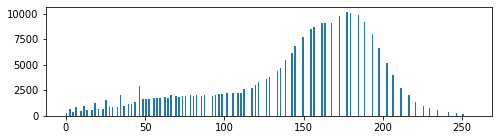


-------------------------------------------------------------------


In [4]:
# In[2] Modificare nivele de gri
print('\n   ----- INFO - In[2] Modificare nivele de gri -----\n')
# Alegere a si b aleator  - dar logic :)
# b - valoare intre [-255, 255]
#   - se alege astfel incat histograma sa fie translatata spre stanga pana 
#   la valoarea 0 - alegere optima ca intensitatea minima care apare in imagine 
# a - valoare intre [0,10]
#   - se alege mai intai a = 1 
#       - vom observa ca histograma este translatata spre dreapta si imaginea 
#           se intuneca
#   - se creste a cu un pas de 0.5 pana cand hostograma este redistribuita 
#           pe intregul interval [0,255] => imaginea procesata placuta vizual
b = -50
a = 2.3 #2.2

# fiecare intensitate din imagine se inmulteste cu a si se aduna b la rezultat
imgGrayAj = a * (imgGray + b)

fig = plt.figure(figsize=(10,10)); plt.imshow(imgGrayAj, cmap='gray', vmin=0, vmax=255); plt.show()
fig = plt.figure(figsize=(8,2)); plt.hist(imgGrayAj.ravel(),256,[0,256]); plt.show()
print('\n-------------------------------------------------------------------')


   ----- INFO - In[3] Accentuare contrast utilizand functia liniara pe portiuni -----



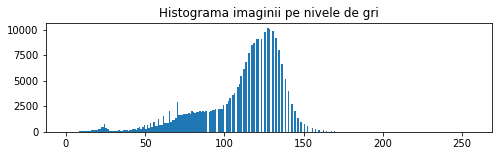

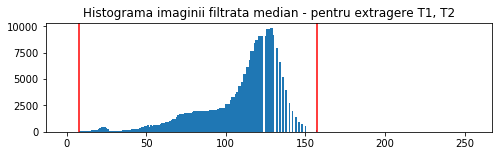

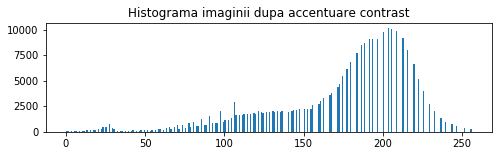

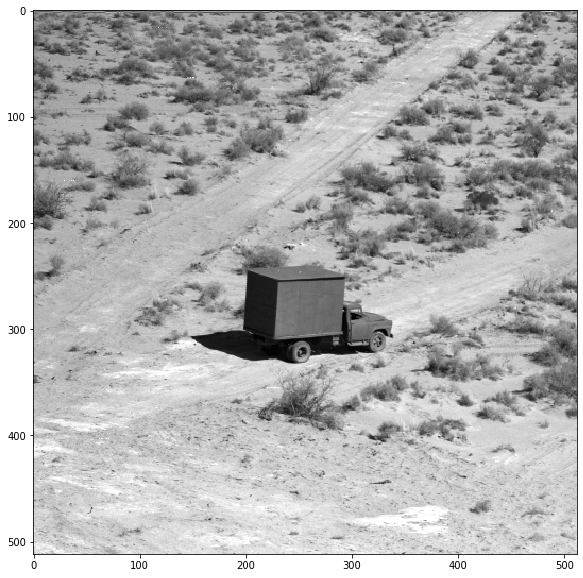


-------------------------------------------------------------------


In [5]:
# In[3] Accentuare contrast functia liniara pe portiuni
print('\n   ----- INFO - In[3] Accentuare contrast utilizand functia liniara pe portiuni -----\n')
# Calculare a si b considerand histograma imaginii imgGray  
#   - T1 - intensitatea minima care apare in imagine
#   - T2 - intensitarea maxima care apare in imagine 

fig = plt.figure(figsize=(8,2)); plt.hist(imgGray.ravel(),256,[0,256]); 
plt.title("Histograma imaginii pe nivele de gri", color='black'); plt.show()

# Calcul automat T1 si T2 

counts, bins = np.histogram(imgGray, range(256))
counts[counts<20] = 0
from scipy.signal import medfilt
counts = medfilt(counts,5)
loc = np.where(counts>0)

T1 = loc[0][0]
T2 = loc[0][-1]

fig = plt.figure(figsize=(8,2)); plt.bar(bins[:-1], counts, width=1, edgecolor='none'); #plt.xlim([-0.5, 255.5]); 
plt.axvline(T1, color='red');plt.axvline(T2, color='red');
plt.title("Histograma imaginii filtrata median - pentru extragere T1, T2", color='black'); plt.show();

# Calcul a si b considerand T1 si T2
a = 255/(T2-T1)
b = -T1

imgGrayAj = a * (imgGray + b)

fig = plt.figure(figsize=(8,2)); plt.hist(imgGrayAj.ravel(),256,[0,256]); 
plt.title("Histograma imaginii dupa accentuare contrast", color='black'); plt.show()
fig = plt.figure(figsize=(10,10)); plt.imshow(imgGrayAj, cmap='gray', vmin=0, vmax=255); plt.show()

print('\n-------------------------------------------------------------------')


   ----- INFO - In[4] Accentuare contrast prin egalizare de histograma -----



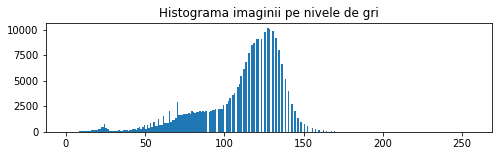

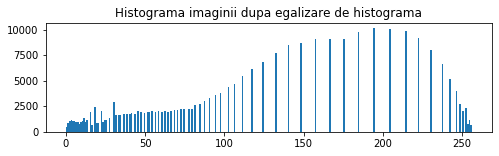

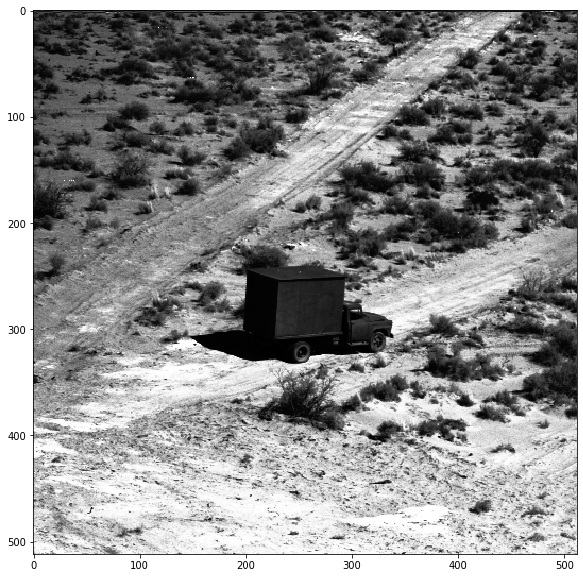


-------------------------------------------------------------------


In [6]:
# In[4] Accentuare contrast prin egalizare de histograma
# Egalizare de histograma
print('\n   ----- INFO - In[4] Accentuare contrast prin egalizare de histograma -----\n')
fig = plt.figure(figsize=(8,2)); plt.hist(imgGray.ravel(),256,[0,256]); 
plt.title("Histograma imaginii pe nivele de gri", color='black'); plt.show()

imgGrayEq = cv2.equalizeHist(imgGray)

fig = plt.figure(figsize=(8,2)); plt.hist(imgGrayEq.ravel(),256,[0,256]);  
plt.title("Histograma imaginii dupa egalizare de histograma", color='black'); plt.show()
fig = plt.figure(figsize=(10,10)); plt.imshow(imgGrayEq, cmap= 'gray', vmin=0, vmax=255); plt.show()
print('\n-------------------------------------------------------------------')